# Time Series Project
 - Forecasting For Monthly Milk Production Using ARIMA/SARIMA, HOLT-WINTER and LSTM Model

## Name: Sourav Saha

## Introduction
 - Milk is one of the main staple foods of a large portion of the world's population. It (milk) plays a vital role in meeting the desperate needs of food demand in urban and rural areas. Milk is an important part of a young child's diet. It is a good source of energy and protein, and contain a wide range of vitamins and minerals, including calcium. It will help young children build bones and keep teeth healthy. A lot of efforts have been made by the government of India to increase the productivity of milk to meet food demand and boost export. India is one of the largest producer of milk in the world, contributing 21% of global milk production. SARIMA/ARIMA and HOLT-WINTER EXPONENTIAL SMOOTHING are some of the most valuable forecasting techniques in predicting future events in time series analysis. Though I also compare with LSTM model in this project. The accuracy of the fitted models is identified through the Root Mean Square Error (RMSE), Mean Absolute Percentage Error (MAPE), Mean Absolute Error (MAE) and Mean Square Error (MSE).

## Objective
 - A comparative studyis performed to forecast the milk production in India for the next five years using ARIMA/SARIMA, Holt-Winter Exponential and LSTM models with the help of accuracy measures. 

## Data Source
 - A time-series approach is used in the monthly milk production data, in terms of pounds per cow between 1962–1975.
 - Data collected from https://bigml.com/user/czuriaga/gallery/dataset/5a8dacbd2a834705180000ec

## Analysis with Coding
 - A comparative study is performed in this project. We imported the data, and then we could
see that there existed 168 observations.

In [ ]:
!pip install pmdarima

In [41]:
# Import necessary libraries
import numpy as np
import seaborn as sns

# dataframe opertations - pandas
import pandas as pd

# plotting data - matplotlib
from matplotlib import pyplot as plt

# time series - statsmodels 
# Seasonality decomposition
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

# SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# holt winters    
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from statsmodels.tools.eval_measures import rmse

# Scaling
from sklearn.preprocessing import MinMaxScaler

# LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [58]:
# Loading dataset
df=pd.read_csv("D:/SOURAV/3rd sem/Time Series/milk_production.csv", sep=',', parse_dates=['Month'], index_col='Month')
df

,Month_production
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [3]:
# dimension of the dataset
df.shape

(168, 1)

In [4]:
# statistical information about the dataset
df.describe()

,Month_production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [5]:
# Checking missing values
df.isnull().sum()

Month_production    0
dtype: int64

#### Normal Time Series Plot

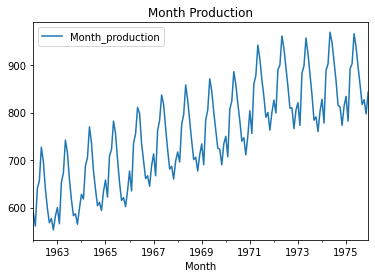

In [6]:
# Time series plot
df.plot(title='Month Production')

## Decomposing the Time Series

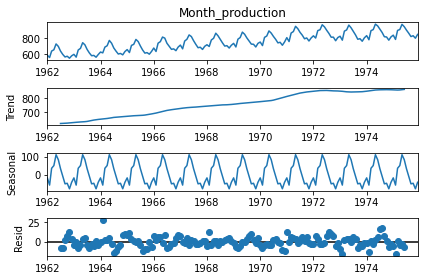

In [7]:
# Additive model
decomposition = seasonal_decompose(df['Month_production'], model='additive')
decomposition.plot()
plt.show()

 - The decomposition plot indicates that the monthly milk production has an increasing trend and seasonal pattern.

## ACF and PACF
 - For stationarity check

C:\Users\Sourav Saha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


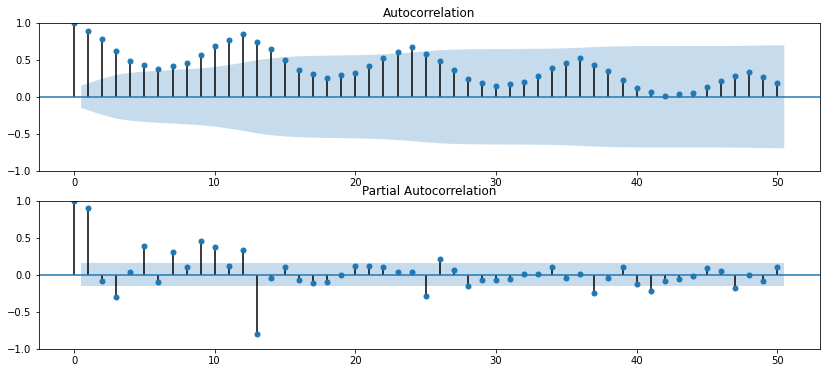

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(df, lags=50, ax=ax1)
ax2 = plot_pacf(df, lags=50, ax=ax2)
plt.savefig('acfpacf2')
plt.show()

- Here we see that both ACF and PACF plots do not show a quick cut off into the 95% confidence interval area (in blue) meaning time series is not stationary.

## Statistical test --- Dickey-Fuler Test
 - For stationarity check

- **Null Hypothesis: The data series is not stationary.**
- **Alternative Hypothesis: The data series is stationary.**

In [9]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df['Month_production'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.303812
p-value                          0.627427
#Lags Used                      13.000000
Number of Observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64


- So, we can see p-value(0.627427) grater than 0.05. So we can't reject the null hypothesis. So, we can conclude that the data series is not stationary.

## Making Time Series Data Stationary

In [10]:
df_diff = df.diff().diff(12)

In [11]:
df_diff.dropna(inplace=True)

In [12]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff['Month_production'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -5.038002
p-value                          0.000019
#Lags Used                      11.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


- So, here we can see p-value(0.000019) less than 0.05. So we reject the null hypothesis. So, we can conclude that the data series is stationary.

C:\Users\Sourav Saha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


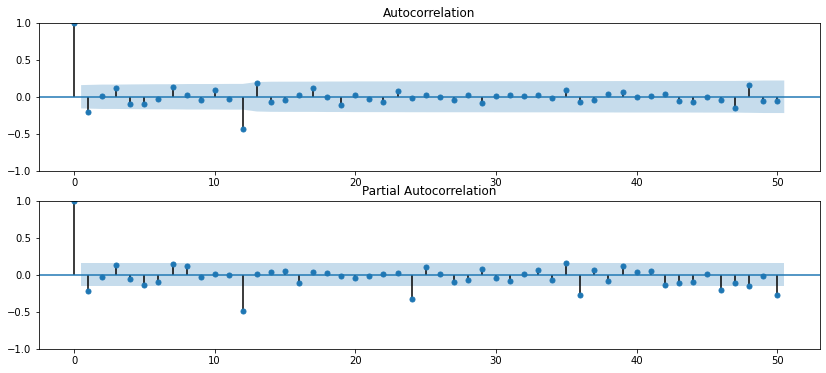

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(df_diff, lags=50, ax=ax1)
ax2 = plot_pacf(df_diff, lags=50, ax=ax2)
plt.savefig('acfpacf2')
plt.show()

- Here we see that both ACF and PACF plots have a quick cut off into the 95% confidence interval area (in blue) meaning time series is not stationary.

## ARIMA & SARIMA MODEL
 - ARIMA models are denoted with the order of ARIMA(p,d,q) and SARIMA models are denoted with the order of SARIMA(p, d, q)(P, D, Q)m.

 - AR(p) is a regression model that utilizes the dependent relationship between an observation and some number of lagged observations.

 - I(d) is the differencing order to make time series stationary.

 - MA(q) is a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

 - (P, D, Q)m, these parameters describe the seasonal components of the model. P, D, and Q represent the seasonal regression, differencing, and moving average coefficients, and m represents the number of data points in each seasonal cycle.

## HOLT EXPONENTIAL SMOOTHING
 - Holt's two-parameter model, also known as linear, exponential smoothing, is a popular smoothing model for forecasting data with trends. Holt's model has three separate equations that work together to generate a final forecast. The first is a basic smoothing equation that directly adjusts the last smoothed value for the previous trend. The trend itself is updated over time through the second equation, where the movement is expressed as the difference between the last two smoothed values.

- **If the data has Trend and Seasonal component both, we can use SARIMA & Holt-Winters.**

- **If we remove Seasonality component, we can use ARIMA and Holt's Exponential.**

- **And if we remove Trend & Seasonality both, we can use ARMA & Simple Exponential as the data will be Stationary then.**

- So, in our case the data series is non-stationary. **So, we can use SARIMA & Holt-Winters.**

## Model Parameter Estimation
 - For automatically extracting the best parameters for Seasonal ARIMA model we will use Python’s pmdarima library. Inside auto_arima function, there are d=1 and D=1 beacause of differentiating once for the trend and once for seasonality, m=12 because of monthly data, and trend='c' to include constant and seasonal=True to fit a seasonal-ARIMA. Besides, we specify trace=True for printing status on the fits. This things gives us to find the best parameters by comparing the AIC scores.

In [14]:
# We will use Python’s pmdarima library, to automatically extract the best parameters for our Seasonal ARIMA model. 
model = pm.auto_arima(df['Month_production'],
                      d=1, D=1, m=12, trend='c', seasonal=True, 
                      start_p=0, start_q=0, max_order=6, test='adf',
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1076.128, Time=0.29 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1121.939, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1083.569, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1068.286, Time=0.14 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1116.950, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1070.017, Time=0.19 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1069.963, Time=0.33 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1084.109, Time=0.17 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1074.277, Time=0.10 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1070.056, Time=0.19 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1069.791, Time=0.18 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1068.200, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1116.800, Time=0.06 sec
 ARIMA(1,1,0)(1,1,1)[12]

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -530.100
Date:                              Tue, 08 Nov 2022   AIC                           1068.200
Time:                                      15:51:35   BIC                           1080.374
Sample:                                  01-01-1962   HQIC                          1073.145
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0211      0.287     -0.074      0.941      -0.584       0.542
ar.L1         -0.2254      0.079     -2.837      0.005      -0.381      -0.070
ma.S.L12      -0.6193      0.071     -8.693      0.000      -0.759      -0.480
sigma2        52.6875      5.100     10.332      0.000      42.693      62.682
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                35.11
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.74
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- The result of auto_arima function with various parameters indicates that the lowest AIC score is obtained when the parameters equal to (1, 1, 0)(0, 1, 1, 12).

#### Splitting Dataset

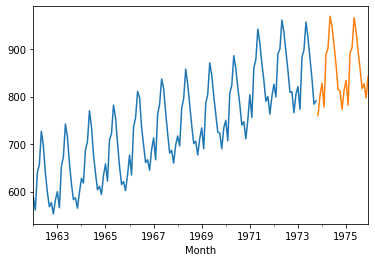

In [16]:
#divide into train and validation set
train = df[:int(0.85*(len(df)))]
test = df[int(0.85*(len(df))):]

#plotting the data
train['Month_production'].plot()
test['Month_production'].plot()

## SARIMA Model

In [17]:
model = SARIMAX(train['Month_production'],
                order=(1,1,0),seasonal_order=(0,1,1,12))
results = model.fit()
results.summary()

C:\Users\Sourav Saha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sourav Saha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                     Month_production   No. Observations:                  142
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -445.603
Date:                              Tue, 08 Nov 2022   AIC                            897.205
Time:                                      15:51:36   BIC                            905.785
Sample:                                  01-01-1962   HQIC                           900.691
                                       - 10-01-1973                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2728      0.087     -3.149      0.002      -0.443      -0.103
ma.S.L12      -0.6158      0.086     -7.163      0.000      -0.784      -0.447
sigma2        56.0244      5.765      9.719      0.000      44.726      67.323
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                40.04
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.86
Prob(H) (two-sided):                  0.71   Kurtosis:                         5.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Insample forecast

In [18]:
test_predictions=results.forecast(steps=len(test))
test_predictions

1973-11-01    752.778857
1973-12-01    791.711168
1974-01-01    816.606839
1974-02-01    775.713691
1974-03-01    876.542364
1974-04-01    891.673647
1974-05-01    952.581491
1974-06-01    923.402597
1974-07-01    880.274565
1974-08-01    839.963752
1974-09-01    792.910898
1974-10-01    798.315156
1974-11-01    760.529333
1974-12-01    799.342887
1975-01-01    824.270956
1975-02-01    783.368969
1975-03-01    884.200054
1975-04-01    899.330679
1975-05-01    960.238702
1975-06-01    931.059759
1975-07-01    887.931741
1975-08-01    847.620924
1975-09-01    800.568071
1975-10-01    805.972328
1975-11-01    768.186506
1975-12-01    807.000060
Freq: MS, Name: predicted_mean, dtype: float64

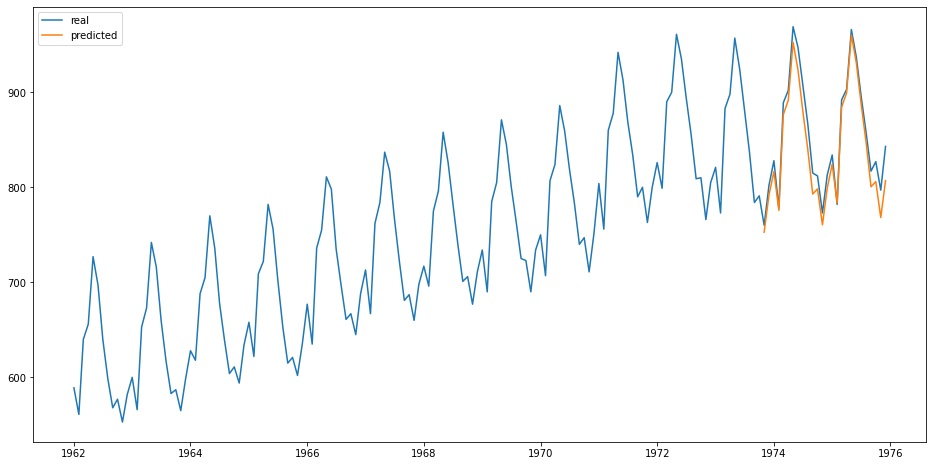

In [19]:
plt.figure(figsize=(16,8))

# Plot actual as line
plt.plot(df['Month_production'].index, df['Month_production'], label='real')

# Plot the prediction as line
plt.plot(test_predictions, label='predicted')

# Plot legend and show figure
plt.legend()
plt.savefig('predtest')
plt.show()

In [20]:
actual = test['Month_production']
data = {'Actual': actual, 'Predicted': test_predictions}
actual_predicted=pd.DataFrame(data)
actual_predicted

,Actual,Predicted
1973-11-01,760,752.778857
1973-12-01,802,791.711168
1974-01-01,828,816.606839
1974-02-01,778,775.713691
1974-03-01,889,876.542364
1974-04-01,902,891.673647
1974-05-01,969,952.581491
1974-06-01,947,923.402597
1974-07-01,908,880.274565
1974-08-01,867,839.963752


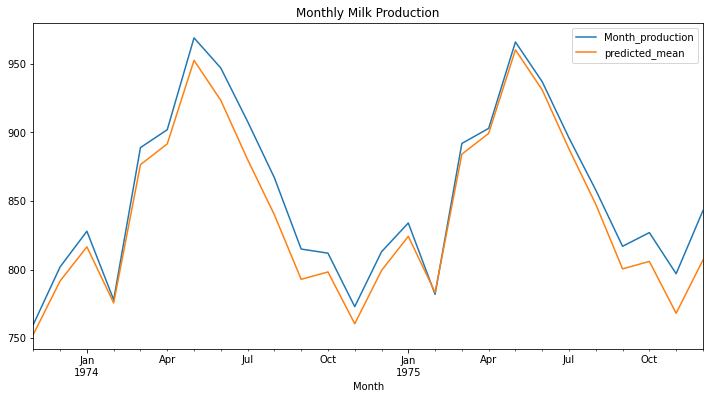

In [21]:
# Plot predictions against known values
title = 'Monthly Milk Production'
ax = test['Month_production'].plot(legend=True,figsize=(12,6),title=title)
test_predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

#### 1. Ljung-Box Test

## For checking Residuals Analysis
 - Residuals are uncorrelated.
 - Residuals are normally ditributed.

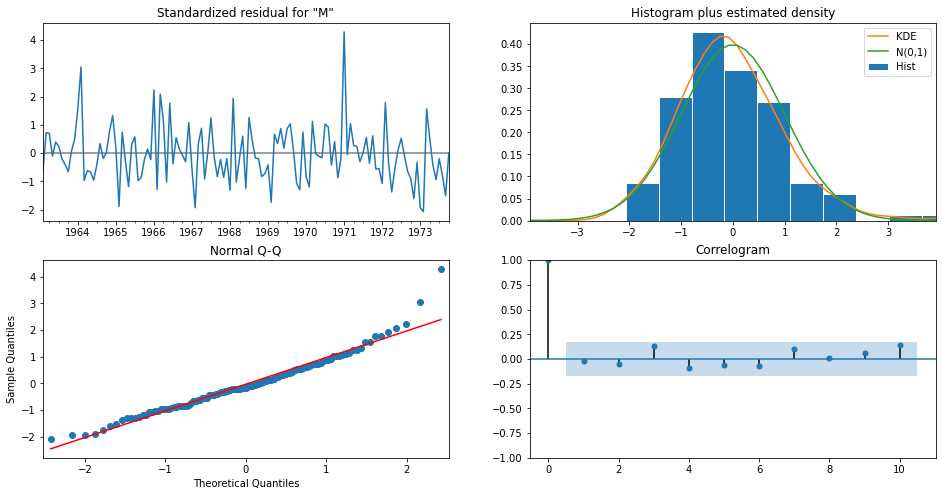

In [22]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('modeldiagnostics')
plt.show()

- Standardized residual plot shows the residuals over time and it appears to be a white noise with no seasonal component.
- Histogram with KDE plot shows that kde line (in red) closely follows the N(0,1) line, which is the standard notation of normal distribution with zero mean and standard deviation of 1, suggesting the residuals are normally distributed.
- Normal QQ-plot shows ordered distribution of residuals (in blue) closely follow the linear trend of the samples taken from a standard normal distribution, suggesting residuals are normally distributed.
- Correlogram plot indicating residuals have a low correlation with lagged versions.

## Statitical Test  -- Ljung-Box Test**
   - For checking uncorrelated or not.

- **Null Hypothesis: The data are independently distributed, no autocorrelation.**
- **Alternative Hypothesis: The data are not independently distributed; they exhibit serial correlation.**

In [23]:
# 3. Ljung-Box residual test on our best model => model2 => ARIMA(3,2,2)(0,1,0)[12]
# For determining max. lags for L-B test, we will use folling formulae :
# h = min(10,n/5) --- for non-seasonal TS
# h = min(2m,n/5) --- for seasonal TS
# n = length of time series
# m = seasonal period

# In our case, we have seasonal ts 
n = len(train)
m = 12
h = min(2*m,n/5)
print ('Results of Ljung-Box Test:')
sm.stats.acorr_ljungbox(x = results.resid,lags = [h], return_df = True)

Results of Ljung-Box Test:


,lb_stat,lb_pvalue
24,28.371439,0.244685


- So, we can see p-value(0.244685) greater than 0.05. So we can't reject null hypothesis. So, we can conclude that the data are independently distributed, no autocorrelation means uncorrelated.

- **So, we can tell that suggest residuals for SARIMA model are normally distributed with low correlation.**

#### 2. Shapiro-Wilk Test

- **Null Hypothesis: The data are normally distributed.**
- **Alternative Hypothesis: The data are not normally distributed.**

In [24]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
shapiro(results.resid)

ShapiroResult(statistic=0.2608654499053955, pvalue=1.1030389602215737e-23)

- So, we can see p-value(0.244685) greater than 0.05. So we can't reject null hypothesis. So, we can conclude that the data are normally distributed

#### Evaluation Metrics

In [25]:
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Month_production'], test_predictions)}, index=['test_sarima'])
evaluation_results['mean_absolute_error'] = mean_absolute_error(test['Month_production'], test_predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(test['Month_production'], test_predictions)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(test['Month_production'], test_predictions))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(test_predictions - test['Month_production'])/np.abs(test['Month_production']))*100


test_metrics= evaluation_results
test_metrics

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
test_sarima,0.924041,14.063152,274.949247,16.581594,1.649936


In [26]:
evaluation_results = pd.DataFrame({'r2_score': r2_score(train['Month_production'], results.fittedvalues)}, index=['train_sarima'])
evaluation_results['mean_absolute_error'] = mean_absolute_error(train['Month_production'], results.fittedvalues)
evaluation_results['mean_squared_error'] = mean_squared_error(train['Month_production'], results.fittedvalues)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(train['Month_production'], results.fittedvalues))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(results.fittedvalues - train['Month_production'])/np.abs(train['Month_production']))*100 

train_metrics = evaluation_results
train_metrics

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
train_sarima,0.664216,14.279953,3179.248748,56.384827,2.210032


In [27]:
em1 = pd.concat([test_metrics,train_metrics])
em1

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
test_sarima,0.924041,14.063152,274.949247,16.581594,1.649936
train_sarima,0.664216,14.279953,3179.248748,56.384827,2.210032


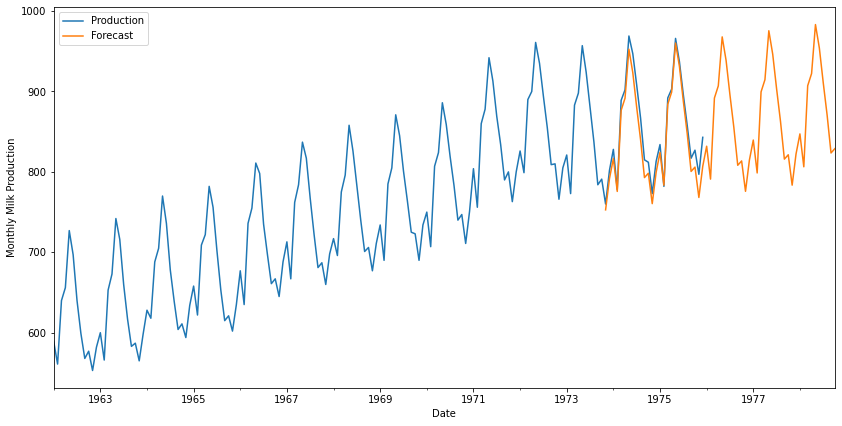

In [28]:
# Outsample forecast
pred_f = results.forecast(steps=60)
#pred_ci = pred_f.conf_int()
ax = df['Month_production'].plot(label='Production', figsize=(14, 7))
pred_f.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Milk Production')
plt.legend()
plt.show()

# Holt-Winter

In [29]:
fitted_model = ExponentialSmoothing(train['Month_production'],trend='add',seasonal='add',seasonal_periods=12).fit()

C:\Users\Sourav Saha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


#### Insample forecast

In [30]:
test_predictions_hw=fitted_model.forecast(steps=len(test))
test_predictions_hw

1973-11-01    763.667209
1973-12-01    800.939714
1974-01-01    827.377487
1974-02-01    791.790211
1974-03-01    883.292079
1974-04-01    900.623659
1974-05-01    962.957837
1974-06-01    936.121629
1974-07-01    886.708383
1974-08-01    845.958454
1974-09-01    806.041071
1974-10-01    811.544836
1974-11-01    783.431863
1974-12-01    820.704368
1975-01-01    847.142141
1975-02-01    811.554865
1975-03-01    903.056732
1975-04-01    920.388313
1975-05-01    982.722491
1975-06-01    955.886282
1975-07-01    906.473037
1975-08-01    865.723107
1975-09-01    825.805725
1975-10-01    831.309489
1975-11-01    803.196516
1975-12-01    840.469021
Freq: MS, dtype: float64

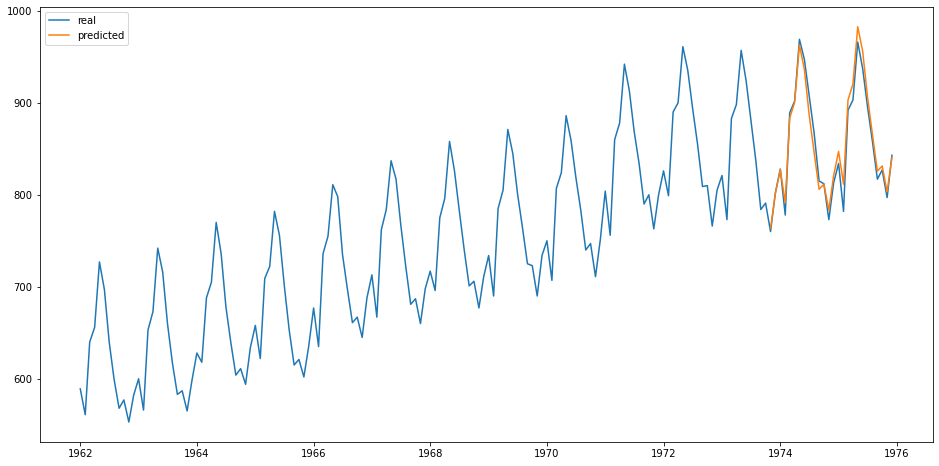

In [31]:
plt.figure(figsize=(16,8))

# Plot past CO2 levels
plt.plot(df['Month_production'].index, df['Month_production'], label='real')

# Plot the prediction means as line
plt.plot(test_predictions_hw, label='predicted')

# Shade between the confidence intervals
#plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.savefig('predtest')
plt.show()

In [32]:
actual = test['Month_production']
data1 = {'Actual': actual, 'Predicted': test_predictions_hw}
actual_predicted1=pd.DataFrame(data1)
actual_predicted1

,Actual,Predicted
1973-11-01,760,763.667209
1973-12-01,802,800.939714
1974-01-01,828,827.377487
1974-02-01,778,791.790211
1974-03-01,889,883.292079
1974-04-01,902,900.623659
1974-05-01,969,962.957837
1974-06-01,947,936.121629
1974-07-01,908,886.708383
1974-08-01,867,845.958454


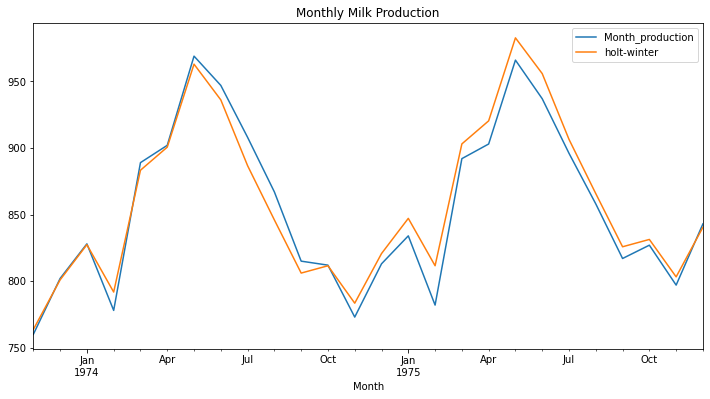

In [33]:
# Plot predictions against known values
title = 'Monthly Milk Production'
ax = test['Month_production'].plot(legend=True,figsize=(12,6),title=title)
test_predictions_hw.plot(legend=True,label='holt-winter')
ax.autoscale(axis='x',tight=True)

#### Checking normality of residuals using distribution plot and q-q plot

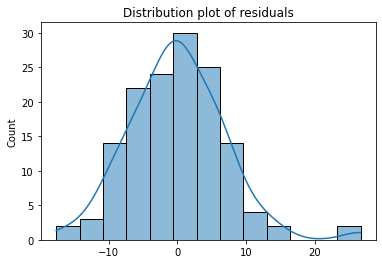

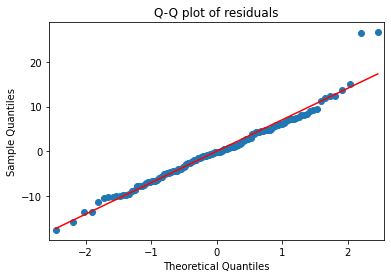

In [34]:
plt.figure()
sns.histplot(fitted_model.resid, kde = True)
plt.title('Distribution plot of residuals')
sm.qqplot(fitted_model.resid, line = 'r')
plt.title('Q-Q plot of residuals')
plt.show()

- Normal QQ-plot and Histogram with KDE plot both shows ordered distribution of residuals closely follow the linear trend of the samples taken from a standard normal distribution, suggesting residuals are normally distributed.

## Statitical Test --- Ljung-Box Test
 - For checking autocorrelation

- **Null Hypothesis: The data are independently distributed, no autocorrelation.**
- **Alternative Hypothesis: The data are not independently distributed; they exhibit serial correlation.**

In [35]:
print ('Results of Ljung-Box Test:')
sm.stats.acorr_ljungbox(fitted_model.resid, lags=[12], return_df=True)

Results of Ljung-Box Test:


,lb_stat,lb_pvalue
12,11.919537,0.452163


- So, we can see p-value(0.450527) greater than 0.05. So we can't reject null hypothesis. So, we can conclude that the data are independently distributed, no autocorrelation means uncorrelated.

- **So, we can tell that suggest residuals for Holt-Winter model are normally distributed with low correlation.**

#### Evaluation Metrics

In [36]:
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Month_production'], test_predictions_hw)}, index=['test_holt-winter'])
evaluation_results['mean_absolute_error'] = mean_absolute_error(test['Month_production'], test_predictions_hw)
evaluation_results['mean_squared_error'] = mean_squared_error(test['Month_production'], test_predictions_hw)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(test['Month_production'], test_predictions_hw))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(test_predictions_hw - test['Month_production'])/np.abs(test['Month_production']))*100 


test_metrics1= evaluation_results
test_metrics1


,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
test_holt-winter,0.957959,9.993007,152.175836,12.335957,1.164091


In [37]:
evaluation_results = pd.DataFrame({'r2_score': r2_score(train['Month_production'], fitted_model.fittedvalues)}, index=['train_holt-winter'])
evaluation_results['mean_absolute_error'] = mean_absolute_error(train['Month_production'], fitted_model.fittedvalues)
evaluation_results['mean_squared_error'] = mean_squared_error(train['Month_production'], fitted_model.fittedvalues)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(train['Month_production'], fitted_model.fittedvalues))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(fitted_model.fittedvalues - train['Month_production'])/np.abs(train['Month_production']))*100 


train_metrics1 = evaluation_results
train_metrics1

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
train_holt-winter,0.994859,5.256409,48.679647,6.97708,0.729455


In [38]:
em2 = pd.concat([test_metrics1,train_metrics1])
em2

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
test_holt-winter,0.957959,9.993007,152.175836,12.335957,1.164091
train_holt-winter,0.994859,5.256409,48.679647,6.977080,0.729455


## LSTM

In [59]:
# Splitting dataset same as previous splitting
train_data = df[:len(df)-26]
test_data = df[len(df)-26:]

In [60]:
# Scaled our train and test dataset
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

- TimeseriesGenerator can be used to automatically transform a univariate or multivariate time series dataset into a supervised learning problem.
- It will basically embed time series inside a TimeSeriesGenerator object that will later directly be feed inside the network. 

In [61]:
# Creating LSTM model
n_input = 26
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 200)               161600    
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Fitting model
lstm_model.fit_generator(generator,epochs=20)

Epoch 1/20


<ipython-input-62-dcd31fc91329>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  lstm_model.fit_generator(generator,epochs=20)


116/116 [==============================] - 9s 73ms/step - loss: 0.0438
Epoch 2/20
116/116 [==============================] - 9s 73ms/step - loss: 0.0269
Epoch 3/20
116/116 [==============================] - 9s 75ms/step - loss: 0.0266
Epoch 4/20
116/116 [==============================] - 8s 72ms/step - loss: 0.0286
Epoch 5/20
116/116 [==============================] - 8s 72ms/step - loss: 0.0251
Epoch 6/20
116/116 [==============================] - 8s 72ms/step - loss: 0.0244
Epoch 7/20
116/116 [==============================] - 8s 72ms/step - loss: 0.0227
Epoch 8/20
116/116 [==============================] - 8s 71ms/step - loss: 0.0226
Epoch 9/20
116/116 [==============================] - 8s 71ms/step - loss: 0.0189
Epoch 10/20
116/116 [==============================] - 9s 75ms/step - loss: 0.0208
Epoch 11/20
116/116 [==============================] - 9s 76ms/step - loss: 0.0176
Epoch 12/20
116/116 [==============================] - 9s 76ms/step - loss: 0.0086
Epoch 13/20
116/116 [===

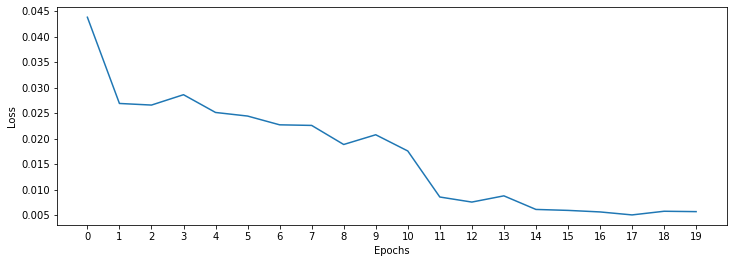

In [63]:
# Plotting loos of LSTM model
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [64]:
# Predictions
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 [==============================] - 0s 23ms/step


In [65]:
lstm_predictions_scaled

[array([0.5853435], dtype=float32),
 array([0.62005603], dtype=float32),
 array([0.6646235], dtype=float32),
 array([0.7052655], dtype=float32),
 array([0.7719897], dtype=float32),
 array([0.82761884], dtype=float32),
 array([0.86288524], dtype=float32),
 array([0.8552257], dtype=float32),
 array([0.81560695], dtype=float32),
 array([0.75298417], dtype=float32),
 array([0.6831074], dtype=float32),
 array([0.63031733], dtype=float32),
 array([0.6105865], dtype=float32),
 array([0.6259146], dtype=float32),
 array([0.648247], dtype=float32),
 array([0.6721796], dtype=float32),
 array([0.74207413], dtype=float32),
 array([0.81138754], dtype=float32),
 array([0.8524585], dtype=float32),
 array([0.8441411], dtype=float32),
 array([0.80188346], dtype=float32),
 array([0.7336024], dtype=float32),
 array([0.652313], dtype=float32),
 array([0.6133529], dtype=float32),
 array([0.6235633], dtype=float32),
 array([0.64797664], dtype=float32)]

In [66]:
# We scaled our data that’s why we have to inverse it to see true predictions.
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[791.82013988],
       [805.98286152],
       [824.16638756],
       [840.74833298],
       [867.9717989 ],
       [890.66848564],
       [905.05717659],
       [901.93207836],
       [885.7676363 ],
       [860.21753979],
       [831.70780945],
       [810.16947079],
       [802.1193018 ],
       [808.37314606],
       [817.48477745],
       [827.24926853],
       [855.76624584],
       [884.04611588],
       [900.80305862],
       [897.40957928],
       [880.16845131],
       [852.30978107],
       [819.14370155],
       [803.24798107],
       [807.41382217],
       [817.37446785]])

In [67]:
# Insample forecasting
test_data['LSTM_Predictions'] = lstm_predictions
test_data

<ipython-input-67-6e148a6aae9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['LSTM_Predictions'] = lstm_predictions


,Month_production,LSTM_Predictions
Month,,
1973-11-01,760,791.820140
1973-12-01,802,805.982862
1974-01-01,828,824.166388
1974-02-01,778,840.748333
1974-03-01,889,867.971799
1974-04-01,902,890.668486
1974-05-01,969,905.057177
1974-06-01,947,901.932078
1974-07-01,908,885.767636


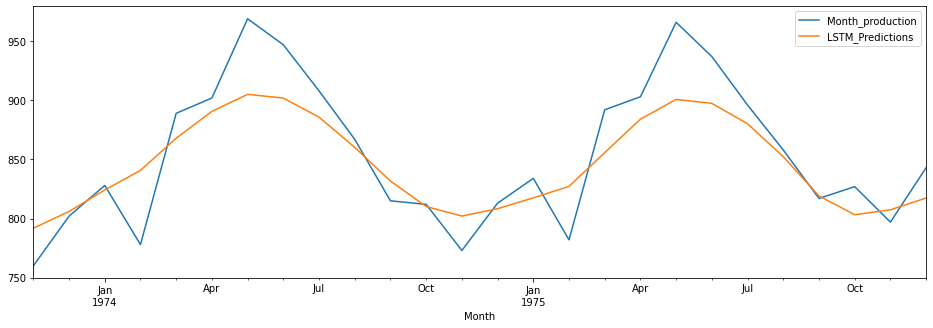

In [68]:
# Plotting actual and predicted_lstm values
test_data['Month_production'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

#### Evaluation metrics

In [97]:
r2 = r2_score(test_data['Month_production'], test_data["LSTM_Predictions"])
lstm_rmse_error = rmse(test_data['Month_production'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
lstm_mae_error = mean_absolute_error(test_data['Month_production'], test_data["LSTM_Predictions"])
lstm_mape_error = np.mean(np.abs(test_data["LSTM_Predictions"] - test_data['Month_production'])/np.abs(test_data['Month_production']))*100 

In [98]:
# initialize list of lists
lstm_em_list = [[r2, lstm_mae_error, lstm_mse_error, lstm_rmse_error, lstm_mape_error]]

In [99]:
em3 = pd.DataFrame(lstm_em_list, columns=['r2_score','mean_absolute_error','mean_squared_error','root_mean_squared_error','mean_absolute_percentage_error'],index=['test_LSTM'])
em3

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
test_LSTM,0.736589,24.240425,953.471544,30.878335,2.8018


# SARIMA, Holt-Winter and LSTM Model Comparison 

### Actual and Predicted values of SARIMA, Holt-Winter and LSTM model

In [92]:
actual = test['Month_production']
data = {'Actual': actual, 'Predicted_SARIMA': test_predictions, 'Predicted_Holt-Winter': test_predictions_hw}
actual_predicted=pd.DataFrame(data)
actual_predicted['LSTM_Predictions'] = lstm_predictions
actual_predicted

,Actual,Predicted_SARIMA,Predicted_Holt-Winter,LSTM_Predictions
1973-11-01,760,752.778857,763.667209,791.820140
1973-12-01,802,791.711168,800.939714,805.982862
1974-01-01,828,816.606839,827.377487,824.166388
1974-02-01,778,775.713691,791.790211,840.748333
1974-03-01,889,876.542364,883.292079,867.971799
1974-04-01,902,891.673647,900.623659,890.668486
1974-05-01,969,952.581491,962.957837,905.057177
1974-06-01,947,923.402597,936.121629,901.932078
1974-07-01,908,880.274565,886.708383,885.767636
1974-08-01,867,839.963752,845.958454,860.217540


### Plot of Actual and Predicted values of SARIMA, Holt-Winter and LSTM model

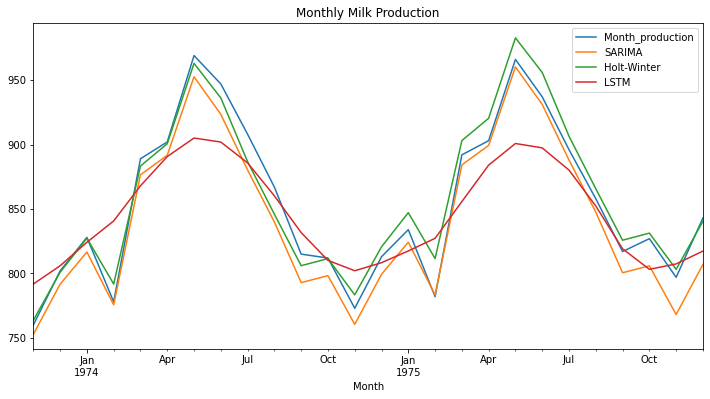

In [93]:
# Plot predictions against known values
title = 'Monthly Milk Production'
ax = test['Month_production'].plot(legend=True,figsize=(12,6),title=title)
test_predictions.plot(legend=True, label='SARIMA')
test_predictions_hw.plot(legend=True,label='Holt-Winter')
test_data['LSTM_Predictions'].plot(legend = True,label='LSTM');
ax.autoscale(axis='x',tight=True)

- From this plot we can visualze that LSTM model is not good fit for forecasting the time series data.

### Evaluation metrics for SARIMA, Holt-Winter and LSTM model

In [94]:
em4 = pd.concat([em1,em2,em3])
em4

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
test_sarima,0.924041,14.063152,274.949247,16.581594,1.649936
train_sarima,0.664216,14.279953,3179.248748,56.384827,2.210032
test_holt-winter,0.957959,9.993007,152.175836,12.335957,1.164091
train_holt-winter,0.994859,5.256409,48.679647,6.977080,0.729455
test_LSTM,0.736589,24.240425,953.471544,30.878335,2.801800


In [95]:
# Getting index as a column of dataframe
em4['index'] = em4.index
em4

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error,index
test_sarima,0.924041,14.063152,274.949247,16.581594,1.649936,test_sarima
train_sarima,0.664216,14.279953,3179.248748,56.384827,2.210032,train_sarima
test_holt-winter,0.957959,9.993007,152.175836,12.335957,1.164091,test_holt-winter
train_holt-winter,0.994859,5.256409,48.679647,6.977080,0.729455,train_holt-winter
test_LSTM,0.736589,24.240425,953.471544,30.878335,2.801800,test_LSTM


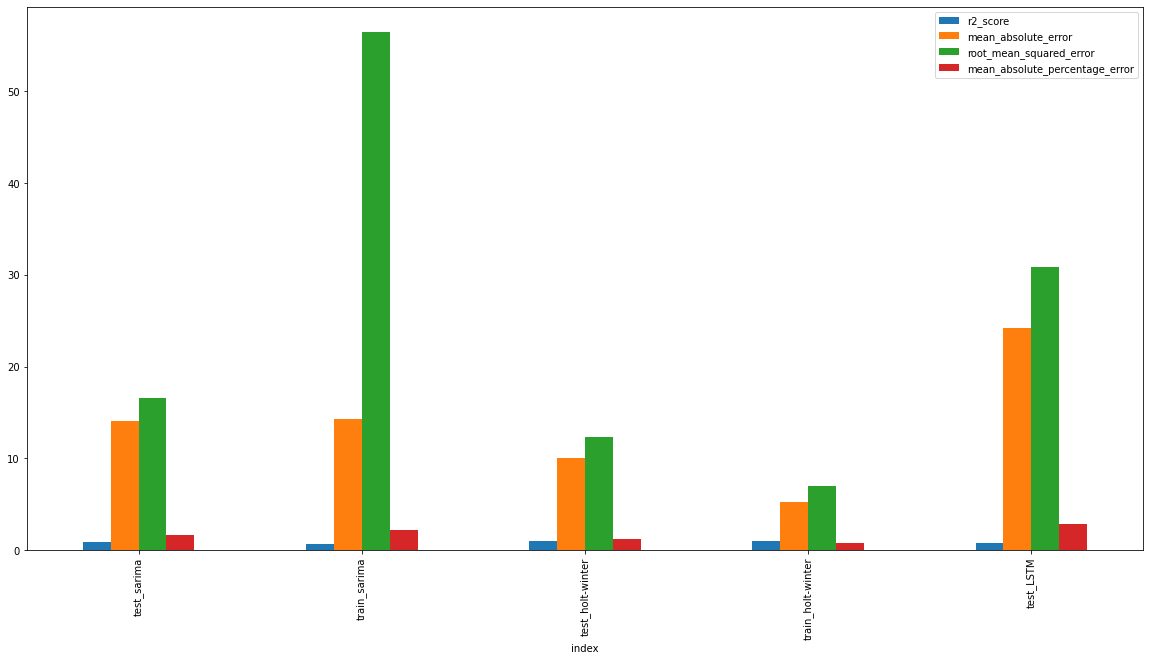

In [96]:
# plot the dataframe
em4.plot(x='index', y=["r2_score", "mean_absolute_error", "root_mean_squared_error", "mean_absolute_percentage_error"], kind="bar", figsize=(20, 10))
 
# print bar graph
plt.show()

- So, from this graph we can tell that the Holt-Winter model is a better model with less mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error values and with greater r2_score values than SARIMA and LSTM.
- Let's forecast the next 5 years means next 60 months values using Holt-Winter model.

## Outsample Forecasting using the best model (Holt-Winter)

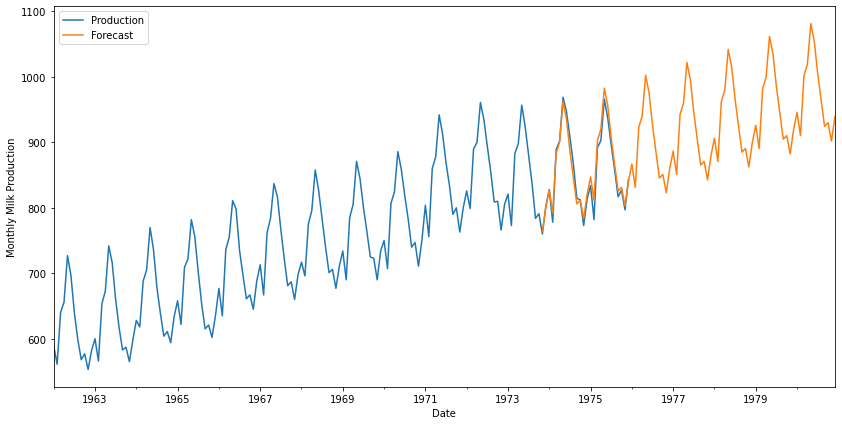

In [99]:
# Outsample forecast
pred_f = fitted_model.forecast(steps=86)
ax = df['Month_production'].plot(label='Production', figsize=(14, 7))
pred_f.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Milk Production')
plt.legend()
plt.show()

In [107]:
pd.DataFrame(pred_f.iloc[26:])

,0
1976-01-01,866.906795
1976-02-01,831.319518
1976-03-01,922.821386
1976-04-01,940.152967
1976-05-01,1002.487145
1976-06-01,975.650936
1976-07-01,926.237691
1976-08-01,885.487761
1976-09-01,845.570379
1976-10-01,851.074143


- Finally we have forecasted using Holt-Winter exponential smoothing for the next 5 years milk production mpnthly wise in India.

# Conclusion
 - Forecasting is a more important problem in the fields of business and industry, economics, medicine, finance and it's used for planning and decision making. In this study, we have computed the milk productions monthly wise in India. The predicted values are nearest to the actual values and some of the forecasting values are the more nearest to the actual values.
 - The model verified with the available observed data with the forecasted from 1962 to 1975, the available observed value is almost nearest to the forecasted value for exponential smoothing. The advantage of Holt-Winter exponential smoothing method given better accuracy in RMSE, MAPE, MAE, MSE, r2 score comparing with SARIMA and LSTM. 
 - This model forecasted production revealed an increase in the prices of milk in the future years and also demand for cows. Hence, increase in the area of production and their sale in the suitable markets can be planned suitably. Hence the method used is Holt-Winter exponential smoothing to forecast the future values.